# WB3 - Predictive Analysis

---

In [1]:
# importing packages

#############################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

import plotly.graph_objects as go
#import sweetviz

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

---
The third and most extensive workbook (WB3) contains the predictive model building (supervised learning classifier). Refer to WB1 for detailed insights in the data cleaning process, and WB2 for the descriptive insights gathered to this point. The analysis performed in this workbook build on top of the previously seen and conducted analysis.

---

In [2]:
#load data

############################# Cleaned Data #############################
#load questions only
df_pred = pd.read_csv('/project/DATA/Kaggle_Survey/Data_Cleaning/CLEANED_prediction.csv')
print(df_pred.shape)

(8942, 248)


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (146) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
df_pred.head(1)

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,valid_response,yearly_comp_numerical
0,510,22-24,Male,-1,France,Master’s degree,Data/Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,NaN,NaN,NaN,-1,"Basic statistical software (Microsoft Excel, G...",0,-1,-1,-1,-1,-1,1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,PyCharm,NaN,MATLAB,NaN,Spyder,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,Python,R,SQL,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,NaN,NaN,-1,Python,-1,NaN,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,CPUs,GPUs,NaN,NaN,NaN,-1,Never,1-2 years,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
df_pred.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q2_OTHER_TEXT', 'Q3', 'Q4', 'Q5', 'Q5_OTHER_TEXT', 'Q6', 'Q7',
       ...
       'Q34_Part_6', 'Q34_Part_7', 'Q34_Part_8', 'Q34_Part_9', 'Q34_Part_10', 'Q34_Part_11', 'Q34_Part_12', 'Q34_OTHER_TEXT', 'valid_response', 'yearly_comp_numerical'], dtype='object', length=248)

In [5]:
#compensation by profession
###################################
print(df_pred['yearly_comp_numerical'].mean())
df_pred.groupby(df_pred['Q5'])['yearly_comp_numerical'].mean()

53610.50827555357


Q5
Business/Data Analyst      34674.142051
DBA/Database Engineer      47323.390152
Data Scientist             71292.753043
Data/Software Engineer     53372.335742
Product/Project Manager    61497.482055
Researcher                 43664.603767
Name: yearly_comp_numerical, dtype: float64

In [6]:
df_pred

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,valid_response,yearly_comp_numerical
0,510,22-24,Male,-1,France,Master’s degree,Data/Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,NaN,NaN,NaN,-1,"Basic statistical software (Microsoft Excel, G...",0,-1,-1,-1,-1,-1,1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,PyCharm,NaN,MATLAB,NaN,Spyder,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,Python,R,SQL,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,NaN,NaN,-1,Python,-1,NaN,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,CPUs,GPUs,NaN,NaN,NaN,-1,Never,1-2 years,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

---
In order to find cut-off point between compensation levels quartiles were used.


---

In [7]:
#quantiles of compensation
###################################
df_pred.yearly_comp_numerical.quantile([0.25,0.5,0.75,0.8,0.825,0.85,0.875,0.9,0.95])

0.250      8749.5
0.500     34999.5
0.750     74999.5
0.800     94999.5
0.825     94999.5
0.850    112499.5
0.875    112499.5
0.900    137499.5
0.950    174999.5
Name: yearly_comp_numerical, dtype: float64

### Feature Selection

---
The following outlines the feature selection (and transformation) process for the predictive model. The initial selection was based on a variable’s theoretical relevance for the classification model, followed by an iterative validation of the selection on the classifier itself.

---

In [8]:
#size of dataset
###################################
print('-'*10)
print('Dataframe (before Feature Selection):', df_pred.shape)
print('-'*10)

----------
Dataframe (before Feature Selection): (8942, 248)
----------


In [9]:
#combining the ressponses and questions on a per question basis
###################################

#dict for questions
questions = {
    'Q1': 'What is your gender?',
    'Q2': 'What is your age (# years)?',
    'Q3': 'In which country do you currently reside?',
    'Q4': 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
    'Q5': 'Which best describes your undergraduate major?',
    'Q6': 'Select the title most similar to your current role (or most recent title if retired)',
    'Q7': 'In what industry is your current employer/contract (or your most recent employer if retired)?',
    'Q8': 'Does your current employer incorporate machine leanring?',
    'Q9': 'Select any activities that make up an important part of your role at work.',
    'Q10': 'What is your current yearly compensation?',
    'Q11': 'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?',
    'Q12': 'Who/what are your favorite media sources that report on data science topics?',
    'Q13': 'On which platforms have you begun or completed data science courses?',
    'Q14': 'What is the primary tool that you use at work or school to analyze data?',
    'Q15': 'How long have you been writing code to analyze data?',
    'Q16': 'Which of the following integrated development environments (IDEs) do you use on a regular basis?',
    'Q17': 'Which of the following hosted notebook products do you use on a regular basis?',
    'Q18': 'What programming languages do you use on a regular basis?',
    'Q19': 'What programming language would you recommend an aspiring data scientist to learn first?',
    'Q20': 'What data visualization libraries or tools do you use on a regular basis?',
    'Q21': 'Which types of specialized hardware do you use on a regular basis?',
    'Q22': 'Have you ever used a TPU (tensor processing unit)?',
    'Q23': 'For how many years have you used machine learning methods?',
    'Q24': 'Which of the following ML algorithms do you use on a regular basis?',
    'Q25': 'Which categories of ML tools do you use on a regular basis?',
    'Q26': 'Which categories of computer vision methods do you use on a regular basis?',
    'Q27': 'Which of the following natural language processing (NLP) methods do you use on a regular basis?',
    'Q28': 'Which of the following machine learning frameworks do you use on a regular basis?',
    'Q29': 'Which of the following cloud computing platforms do you use on a regular basis?',
    'Q30': 'Which specific cloud computing products do you use on a regular basis?',
    'Q31': 'Which specific big data / analytics products do you use on a regular basis?',
    'Q32': 'Which of the following machine learning products do you use on a regular basis?',
    'Q33': 'Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?',
    'Q34': 'Which of the following relational database products do you use on a regular basis?',
}
#questions

#dict for responses
responses = {'Q1': df_pred.iloc[:,1],'Q2': df_pred.iloc[:,2],'Q3': df_pred.iloc[:,4],
           'Q4': df_pred.iloc[:,5],'Q5': df_pred.iloc[:,6],'Q6': df_pred.iloc[:,8],
           'Q7': df_pred.iloc[:,9],'Q8': df_pred.iloc[:,10],'Q9': df_pred.iloc[:,11:19],
           'Q10': df_pred.iloc[:,20],'Q11': df_pred.iloc[:,21],'Q12': df_pred.iloc[:,22:34],
           'Q13': df_pred.iloc[:,35:47],'Q14': df_pred.iloc[:,48:49],'Q15': df_pred.iloc[:,55:56],
           'Q16': df_pred.iloc[:,56:69],'Q17': df_pred.iloc[:,69:82],'Q18': df_pred.iloc[:,82:95],
           'Q19': df_pred.iloc[:,95:97],'Q20': df_pred.iloc[:,97:110],'Q21': df_pred.iloc[:,110:116],
           'Q22': df_pred.iloc[:,116:117],'Q23': df_pred.iloc[:,117:118],'Q24': df_pred.iloc[:,118:131],
           'Q25': df_pred.iloc[:,131:140],'Q26': df_pred.iloc[:,140:148],'Q27': df_pred.iloc[:,148:155],
           'Q28': df_pred.iloc[:,155:168],'Q29': df_pred.iloc[:,168:181],'Q30': df_pred.iloc[:,181:194],
           'Q31': df_pred.iloc[:,194:207],'Q32': df_pred.iloc[:,207:220],'Q33': df_pred.iloc[:,220:233],
           'Q34': df_pred.iloc[:,233:246],
          } 
#responses

#output
print('Shape Questions: ',len(questions))
print('Shape Responses: ',len(responses))

Shape Questions:  34
Shape Responses:  34


In [10]:
#functions to handle predcition data are defined
##############################

#normalize labels of defined dicts
def normalize_labels(insert_label):
    try:
        label_short = insert_label.split('<>')[1] 
    except IndexError:
        label_short = insert_label.split('<>')[0]
    return label_short

#function to treat question data accordingly
def handle_data(data, idx, tresh):
    result = pd.get_dummies(data, prefix_sep='<>', drop_first=False)
    #print(result)
    cols = [normalize_labels(str(x)) for x in result.columns]
    try:
        Qtext = df_pred['Q{}'.format(idx)]
    except KeyError:
        try:
            Qtext = df_pred['Q{}_Part_1'.format(idx)]
        except KeyError:
            Qtext = df_pred['Q{}_MULTIPLE_CHOICE'.format(idx)]
            
    #renaming of features
    prefix = 'Q{}-'.format(idx)
    result.columns = [prefix + x for x in cols]
    
    #filter for questions below required reponse rate
    percent_answer = result.sum() / result.shape[0]
    #print(percent_answer)
    for row in percent_answer.iteritems():
        if row[1] < tresh:
            result = result.drop(row[0], axis=1)
    return result

#code inspored by similar classification prediction: https://www.kaggle.com/andresionek/what-makes-a-kaggler-valuable

---
As outlined in great detail within the report, data selection for the prediction model is crucial. The below selects several questions most important for the prediction.

---

In [11]:
#question selection for predition model
##############################

############################################################################
questions = [1,2,3,4,5,6,7,8,9,11,12,13,14,15,22,23,26]
############################################################################

dict_treat_data = {}

#removing questions w/ less than 5% respondents answering
for sq in questions:
    #print('Q{}'.format(sq))
    dict_treat_data['Q{}'.format(sq)] = handle_data(responses['Q{}'.format(sq)], sq, 0.05)
    #print(treated_data)

### Target Variable Engineering 

---
Target variables engineering commenced. As outlined every response with annual compensation above the 75% quartile (74999,5) is labeled as 'top25' of professionals.


---

In [12]:
#transform for analysis of top quartile in terms of compensation
##############################

clean_dataset = (df_pred.yearly_comp_numerical >= 74999.5).reset_index().astype(int)
#print(clean_dataset)
clean_dataset.columns = ['index', 'top25']

#output
print(clean_dataset.shape)
clean_dataset.head(5)

(8942, 2)


,index,top25
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1


In [13]:
#comebine questions, resonsesn and target variable ('top25')
##############################

#combining loop
for indicator, val in dict_treat_data.items():
    val = val.reset_index(drop=True)
    clean_dataset = clean_dataset.join(val, how='left')

clean_dataset = clean_dataset.drop('index', axis=1)

#output
print('Cleaned dataset: ',clean_dataset.shape)
print('-'*10)
clean_dataset.head(5)

Cleaned dataset:  (8942, 97)
----------


,top25,Q1-22-24,Q1-25-29,Q1-30-34,Q1-35-39,Q1-40-44,Q1-45-49,Q2-Female,Q2-Male,Q3-India,Q3-Other,Q3-United States of America,Q4-Bachelor’s degree,Q4-Doctoral degree,Q4-Master’s degree,Q5-Business/Data Analyst,Q5-Data Scientist,Q5-Data/Software Engineer,Q5-Product/Project Manager,Q5-Researcher,Q6-0-49 employees,"Q6-1000-9,999 employees",Q6-250-999 employees,Q6-50-249 employees,"Q6-> 10,000 employees",Q7-0,Q7-1-2,Q7-10-14,Q7-20+,Q7-3-4,Q7-5-9,Q8-I do not know,Q8-No (we do not use ML methods),Q8-We are exploring ML methods (and may one day put a model into production),"Q8-We have well established ML methods (i.e., models in production for more than 2 years)","Q8-We recently started using ML methods (i.e., models in production for less than 2 years)",Q8-We use ML methods for generating insights (but do not put working models into production),Q9-Analyze and understand data to influence product or business decisions,"Q9-Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Q9-Build prototypes to explore applying machine learning to new areas,Q9-Build and/or run a machine learning service that operationally improves my product or workflows,Q9-Experimentation and iteration to improve existing ML models,Q9-Do research that advances the state of the art of machine learning,Q11-$0 (USD),Q11-$1-$99,"Q11-$10,000-$99,999",Q11-$100-$999,"Q11-$1000-$9,999","Q11-> $100,000 ($USD)",Q12-Twitter (data science influencers),Q12-Hacker News (https://news.ycombinator.com/),"Q12-Reddit (r/machinelearning, r/datascience, etc)","Q12-Kaggle (forums, blog, social media, etc)","Q12-Course Forums (forums.fast.ai, etc)","Q12-YouTube (Cloud AI Adventures, Siraj Raval, etc)","Q12-Podcasts (Chai Time Data Science, Linear Digressions, etc)","Q12-Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)","Q12-Journal Publications (traditional publications, preprint journals, etc)","Q12-Slack Communities (ods.ai, kagglenoobs, etc)",Q12-Other,Q13-Udacity,Q13-Coursera,Q13-edX,Q13-DataCamp,Q13-Kaggle Courses (i.e. Kaggle Learn),Q13-Fast.ai,Q13-Udemy,Q13-LinkedIn Learning,Q13-University Courses (resulting in a university degree),Q13-None,Q13-Other,"Q14-Advanced statistical software (SPSS, SAS, etc.)","Q14-Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q14-Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q14-Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q14-Local development environments (RStudio, JupyterLab, etc.)",Q14-Other,Q15-1-2 years,Q15-10-20 years,Q15-3-5 years,Q15-5-10 years,Q15-< 1 years,Q22-2-5 times,Q22-Never,Q22-Once,Q23-1-2 years,Q23-2-3 years,Q23-3-4 years,Q23-4-5 years,Q23-5-10 years,Q23-< 1 years,"Q26-General purpose image/video tools (PIL, cv2, skimage, etc)","Q26-Image segmentation methods (U-Net, Mask R-CNN, etc)","Q26-Object detection methods (YOLOv3, RetinaNet, etc)","Q26-Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)","Q26-Generative Networks (GAN, VAE, etc)",Q26-None
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0
4,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1

### Correlation Matrix

---
Following the creation of the normalized (and combined) data frame for preiction, one has to look at correlation / co-occurance of variables. Using build in python features the correlation matrix is calculated below.


---

In [14]:
#Correlation measures
####################################

#correlation matrix
correl = clean_dataset.corr().abs()

upper_tri = correl.where(np.triu(np.ones(correl.shape), k=1).astype(np.bool))

#set correlation maximum at 0.6 and find respective variables
drop_vars = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]

#dropping correlated features
clean_dataset_dropped = clean_dataset.drop(drop_vars, axis=1)

#output
print('Data Frame following Correlation Cleaning: ',clean_dataset_dropped.shape)
print('-'*10)
print('Dropped features: ')
drop_vars

Data Frame following Correlation Cleaning:  (8942, 95)
----------
Dropped features: 


['Q2-Male',
 'Q26-Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)']

In [15]:
#check for remaining NaNs in data
####################################
df = clean_dataset_dropped.isnull().sum().to_frame()
#output
print('Number of remaining NaNs: ',df[df[0] > 0].shape[0])

Number of remaining NaNs:  0


### Target Class Balance

---
One can observe target variable inblance, in other words, one label being overproportionally represented. In this specific case label {0} = non-top earner represents the majority.
As discussed within the final report sample imblance can cause model perfromance losses. Therefore, the following will downsample the majority class.


---

In [16]:
clean_dataset_dropped

,top25,Q1-22-24,Q1-25-29,Q1-30-34,Q1-35-39,Q1-40-44,Q1-45-49,Q2-Female,Q3-India,Q3-Other,Q3-United States of America,Q4-Bachelor’s degree,Q4-Doctoral degree,Q4-Master’s degree,Q5-Business/Data Analyst,Q5-Data Scientist,Q5-Data/Software Engineer,Q5-Product/Project Manager,Q5-Researcher,Q6-0-49 employees,"Q6-1000-9,999 employees",Q6-250-999 employees,Q6-50-249 employees,"Q6-> 10,000 employees",Q7-0,Q7-1-2,Q7-10-14,Q7-20+,Q7-3-4,Q7-5-9,Q8-I do not know,Q8-No (we do not use ML methods),Q8-We are exploring ML methods (and may one day put a model into production),"Q8-We have well established ML methods (i.e., models in production for more than 2 years)","Q8-We recently started using ML methods (i.e., models in production for less than 2 years)",Q8-We use ML methods for generating insights (but do not put working models into production),Q9-Analyze and understand data to influence product or business decisions,"Q9-Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Q9-Build prototypes to explore applying machine learning to new areas,Q9-Build and/or run a machine learning service that operationally improves my product or workflows,Q9-Experimentation and iteration to improve existing ML models,Q9-Do research that advances the state of the art of machine learning,Q11-$0 (USD),Q11-$1-$99,"Q11-$10,000-$99,999",Q11-$100-$999,"Q11-$1000-$9,999","Q11-> $100,000 ($USD)",Q12-Twitter (data science influencers),Q12-Hacker News (https://news.ycombinator.com/),"Q12-Reddit (r/machinelearning, r/datascience, etc)","Q12-Kaggle (forums, blog, social media, etc)","Q12-Course Forums (forums.fast.ai, etc)","Q12-YouTube (Cloud AI Adventures, Siraj Raval, etc)","Q12-Podcasts (Chai Time Data Science, Linear Digressions, etc)","Q12-Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)","Q12-Journal Publications (traditional publications, preprint journals, etc)","Q12-Slack Communities (ods.ai, kagglenoobs, etc)",Q12-Other,Q13-Udacity,Q13-Coursera,Q13-edX,Q13-DataCamp,Q13-Kaggle Courses (i.e. Kaggle Learn),Q13-Fast.ai,Q13-Udemy,Q13-LinkedIn Learning,Q13-University Courses (resulting in a university degree),Q13-None,Q13-Other,"Q14-Advanced statistical software (SPSS, SAS, etc.)","Q14-Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q14-Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q14-Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q14-Local development environments (RStudio, JupyterLab, etc.)",Q14-Other,Q15-1-2 years,Q15-10-20 years,Q15-3-5 years,Q15-5-10 years,Q15-< 1 years,Q22-2-5 times,Q22-Never,Q22-Once,Q23-1-2 years,Q23-2-3 years,Q23-3-4 years,Q23-4-5 years,Q23-5-10 years,Q23-< 1 years,"Q26-General purpose image/video tools (PIL, cv2, skimage, etc)","Q26-Image segmentation methods (U-Net, Mask R-CNN, etc)","Q26-Object detection methods (YOLOv3, RetinaNet, etc)","Q26-Generative Networks (GAN, VAE, etc)",Q26-None
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0
4,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [17]:
#showcase target variable inbalance
####################################
clean_dataset_dropped.groupby('top25')['Q1-22-24'].count()

top25
0    6348
1    2594
Name: Q1-22-24, dtype: int64

In [18]:
#sampling data inbalance in target variable
####################################

#import required libraries
from sklearn.utils import resample

#copy data frame up till now & print current shape
df_sampling = clean_dataset_dropped.copy()
print('Current Data Frame:')
print(df_sampling.top25.value_counts())
print('-'*20)

#seperate target variable majority and minority classes
df_majority = df_sampling[df_sampling.top25==0]
df_minority = df_sampling[df_sampling.top25==1]
 
#apply downsampling of target class (sample without replacement)
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=2594,    
                                 random_state=42) 
 
#combine both classes back together minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
#copy data frame for continuing analysis
clean_dataset_dropped = df_downsampled.copy()    

#output
print('Data Frame following Downsampling:')
print(df_downsampled.top25.value_counts())

Current Data Frame:
0    6348
1    2594
Name: top25, dtype: int64
--------------------
Data Frame following Downsampling:
1    2594
0    2594
Name: top25, dtype: int64


### Train/Test Dataset 

---
Continuesly mentioned during the report the dataset is split into training and testing datasets. The below code splits the data with a 80/20 ratio. Please find details below.

---

In [19]:
#training and testing dataset 
####################################

#import required libraries
from sklearn.model_selection import train_test_split

#split data into train/test with 80/20 ration
train, test = train_test_split(clean_dataset_dropped, test_size=0.2, random_state=42)

#output
print('Train Shape:', train.shape)
print('Test Shape:', test.shape)

Train Shape: (4150, 95)
Test Shape: (1038, 95)


In [20]:
#split X and y variables for training and testing dataset
####################################

#training data
ytrain = train['top25'].copy()
Xtrain = train.drop(['top25'], axis=1).copy()

#testing data
ytest = test['top25'].copy()
Xtest = test.drop(['top25'], axis=1).copy()

#output
print('Training Datasets:'),print(ytrain.shape, Xtrain.shape)
print('-'*20)
print('Testing Datasets:'),print(ytest.shape, Xtest.shape)

Training Datasets:
(4150,) (4150, 94)
--------------------
Testing Datasets:
(1038,) (1038, 94)


(None, None)

### Model Prediction Performance (Overview)

In [21]:
#import required libraries
####################################

#individual model libraries
from sklearn.linear_model import LogisticRegression #library for Logistic Regression
from sklearn.ensemble import RandomForestClassifier #library for Random Forrest
from sklearn.neighbors import KNeighborsClassifier #library for K-Neighbot
from sklearn.tree import DecisionTreeClassifier #libraries for decision tree
from sklearn import tree #libraries for ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier #libraries for ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier #libraries for RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier #libraries for AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier #libraries for BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier #libraries for GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB #libraries for GaussianNB
from sklearn.svm import SVC #libraries for SVC
from sklearn.linear_model import SGDClassifier #libraries for Stochastic Gradient Descent

#libraries for model evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#libraries for cross validation
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

#turn off warnings for the model output
import warnings
warnings.filterwarnings('ignore')

In [22]:
#model overview; models used for prediction
####################################

model_dict = {'Logistic Regression':LogisticRegression(),
              'Random Forrest':RandomForestClassifier(),
              'Decision Tree Classifier':tree.DecisionTreeClassifier(),
              'ExtraTrees Classifier':ExtraTreesClassifier(),
              'KNeighbors Classifier':KNeighborsClassifier(),
              'AdaBoost Classifier':AdaBoostClassifier(),
              'Bagging Classifier':BaggingClassifier(),
              'GradientBoosting Classifier':GradientBoostingClassifier(),
              'Support Vector Machines':SVC(),
              'Stochastic Gradient Descent':SGDClassifier(),
              #'XGBoost':XGBClassifier(),
              'GaussianNB':GaussianNB(),
             }

---
The below tables tabulates the model performance results of all analyzed models along Accuracy, Precision, Recall, F-Measure and Fitting Time.

---

In [23]:
#model performance overview
####################################

#apply stratified k-fold with 5 splits
folds = StratifiedKFold(n_splits=5, shuffle=True) #, random_state=42)
folds = 3
list_models_scores = list()

#loop to generate overview
for model_name, model in model_dict.items():
    #perform cross valdiation
    cv_score = cross_validate(model,Xtrain,ytrain, cv=folds, return_train_score=False, n_jobs=-1) #scoring = scoring
    ypred = cross_val_predict(model, Xtrain, ytrain, cv=folds)
    #list of scores
    list_models_scores.append({'Model': model_name,
                                     'Train Accuracy':accuracy_score(ytrain,ypred),
                                     'Precision':precision_score(ytrain,ypred), 
                                     'Recall': recall_score(ytrain,ypred),
                                     'F1-Measure': f1_score(ytrain,ypred),
                                     'fitting_time': cv_score['fit_time'].mean()
                                    })
    
    #output parameter specifics (if required)
    #print(model_name , ' : ' , score['test_f1'])

#output
pd.DataFrame(list_models_scores)

,Model,Train Accuracy,Precision,Recall,F1-Measure,fitting_time
0,Logistic Regression,0.802169,0.813896,0.786194,0.799805,0.119780
1,Random Forrest,0.798795,0.816388,0.773730,0.794487,0.362677
2,Decision Tree Classifier,0.714699,0.709572,0.732023,0.720623,0.031206
3,ExtraTrees Classifier,0.805060,0.816246,0.790029,0.802923,0.417723
4,KNeighbors Classifier,0.708434,0.728601,0.669223,0.697651,0.030609
5,AdaBoost Classifier,0.803855,0.819277,0.782359,0.800392,0.190333
6,Bagging Classifier,0.786506,0.818810,0.738734,0.776714,0.160901
7,GradientBoosting Classifier,0.801687,0.821701,0.773250,0.796740,0.597340
8,Support Vector Machines,0.798313,0.816844,0.771812,0.793690,0.794107
9,Stochastic Gradient Descent,0.802892,0.819235,0.779962,0.799116,0.053656


In [24]:
#results used for report write-up

#    Model	Train Accuracy	Precision	Recall	F1-Measure	fitting_time
#0	Logistic Regression	0.805153	0.819527	0.795215	0.807188	0.097739
#1	Random Forrest	0.796564	0.809524	0.788995	0.799128	0.275768
#2	Decision Tree Classifier	0.711902	0.720404	0.716268	0.718330	0.024431
#3	ExtraTrees Classifier	0.796564	0.810744	0.787081	0.798738	0.402934
#4	KNeighbors Classifier	0.708466	0.737368	0.670335	0.702256	0.026972
#5	AdaBoost Classifier	0.792147	0.804209	0.786124	0.795064	0.151551
#6	Bagging Classifier	0.771534	0.808081	0.727273	0.765550	0.142447
#7	GradientBoosting Classifier	0.801718	0.820500	0.785167	0.802445	0.560829
#8	Support Vector Machines	0.801963	0.822524	0.782775	0.802157	0.437847


#9	Stochastic Gradient Descent	0.786503	0.778793	0.815311	0.796634	0.055941
#10	GaussianNB	0.766626	0.763535	0.789474	0.776288	0.008951

### Hyperparameter Tuning

---
In order to further enhance the predictive capabilities of selected models subsequent hyperparameter tuning is undertaken. As outlined in the report different approaches can be adopted. The author used Gridsearch optimization to test different sets of parameters for each of the previously selected models.

---

In [25]:
#define function to fit models for ensemble
####################################
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

def model_fit_ensemble(model, param_grid, folds):
    model_gs = GridSearchCV(model, param_grid, cv=folds)
    
    #fit model to training data
    model_gs.fit(Xtrain, ytrain)
    #print(model_gs)

    #save best model (based on model estimaors)
    model_best = model_gs.best_estimator_
    print(model_gs.best_estimator_)

    ypred = cross_val_predict(model_best, Xtrain, ytrain, cv=folds)

    model_accuracy = accuracy_score(ytrain,ypred) 
    model_precision = precision_score(ytrain,ypred)
    model_recall = recall_score(ytrain,ypred)
    model_f1 = f1_score(ytrain,ypred)

    #output scores
    print('Train Accuracy:',model_accuracy,
          'Precision:',model_precision,
          'Recall:', model_recall,
          'F1 Score:', model_f1)
    print('-'*10)
    
    return model_best

In [26]:
#Gridsearch Optimization
###################################
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid_LOG = [{'solver':['liblinear'],'random_state':[42]}]
param_grid_RFC = [{'n_estimators':[350,500],'max_features':['auto'],'max_depth':[100,200],'random_state':[42]}]
param_grid_ADA = [{'n_estimators':[1000],'algorithm':['SAMME.R'],'learning_rate':[0.7],'random_state':[42]}]
param_grid_SVC = [{'random_state':[42],'degree':[0.5,0.6],'C':[0.75],'probability':[True]}]

#save best models
log_best = model_fit_ensemble(LogisticRegression(), param_grid_LOG, folds)
rfc_best = model_fit_ensemble(RandomForestClassifier(), param_grid_RFC, folds)
ada_best = model_fit_ensemble(AdaBoostClassifier(), param_grid_ADA, folds)
svc_best = model_fit_ensemble(SVC(), param_grid_SVC, folds)

LogisticRegression(random_state=42, solver='liblinear')
Train Accuracy: 0.8074698795180723 Precision: 0.8187221396731055 Recall: 0.7924256951102588 F1 Score: 0.8053593179049939
----------
RandomForestClassifier(max_depth=100, n_estimators=350, random_state=42)
Train Accuracy: 0.8021686746987952 Precision: 0.8173607626693427 Recall: 0.7809204218600192 F1 Score: 0.7987251777396421
----------
AdaBoostClassifier(learning_rate=0.7, n_estimators=1000, random_state=42)
Train Accuracy: 0.8060240963855422 Precision: 0.8166089965397924 Recall: 0.7919463087248322 F1 Score: 0.8040885860306644
----------
SVC(C=0.75, degree=0.5, probability=True, random_state=42)
Train Accuracy: 0.8065060240963855 Precision: 0.8288057406458227 Recall: 0.7751677852348994 F1 Score: 0.801089918256131
----------


In [27]:
#stored sscores used during analysis

#LogisticRegression(random_state=42, solver='liblinear')
#Train Accuracy: 0.8053987730061349 Precision: 0.8183603338242513 Recall: 0.7976076555023923 F1 Score: 0.8078507390356191
#----------
#RandomForestClassifier(max_depth=100, n_estimators=500, random_state=42)
#Train Accuracy: 0.798282208588957 Precision: 0.8101761252446184 Recall: 0.7923444976076555 F1 Score: 0.8011611030478955
#----------
#AdaBoostClassifier(learning_rate=0.7, n_estimators=1000, random_state=42)
#Train Accuracy: 0.7977914110429448 Precision: 0.8136769078295342 Recall: 0.785645933014354 F1 Score: 0.7994157740993184
#----------
#SVC(C=0.75, degree=0.5, probability=True, random_state=42)
#Train Accuracy: 0.8034355828220859 Precision: 0.8273235144743525 Recall: 0.7794258373205741 F1 Score: 0.802660753880266
#----------

In [28]:
log_best = LogisticRegression(random_state=42, solver='liblinear', fit_intercept=True)
rfc_best = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
ada_best = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.7,
                       n_estimators=1000, random_state=42)
svc_best = SVC(C=0.75, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                        decision_function_shape='ovr', degree=0.5, gamma='scale', kernel='linear',
                        max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
                        verbose=False)

### Voting Classifier 

---
With the stand-alone machine learning algorithms outlined to this point reaching their maximum predictive power, the author reverts to ensemble methods in order to further enhance prediction performance. Therefore, following the individual study of models an ensemble method is used to create a Voting Classifer. It is based on the four previously fine-tuned models.

---

In [29]:
#voting classifier
####################################
from sklearn.ensemble import VotingClassifier

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#select models for voting
voting_clf_param =[('LOG', log_best),('ADA', ada_best),('RFC', rfc_best),('SVC', svc_best)]

#define voting classifier model
vote_best = VotingClassifier(estimators=voting_clf_param, voting='soft',flatten_transform=False)

#fit model
vote_best.fit(Xtrain, ytrain)

#predict model (k-fold, 5 folds)
ypred = cross_val_predict(vote_best, Xtrain, ytrain, cv=folds)

vote_accuracy = accuracy_score(ytrain,ypred)
vote_precision = precision_score(ytrain,ypred)
vote_recall = recall_score(ytrain,ypred)
vote_f1 = f1_score(ytrain,ypred)

    #output scores
print('-'*10), print('Train Accuracy:',vote_accuracy,
                     'Precision:',vote_precision,
                     'Recall:',vote_recall,
                     'F1:', vote_f1), print('-'*10)

#saved scores used during write-up of report
#Train Accuracy: 0.8103067484662577 Precision: 0.8242245199409158 Recall: 0.8009569377990431 F1: 0.812424168891046

----------
Train Accuracy: 0.8093975903614458 Precision: 0.8235882058970515 Recall: 0.7900287631831256 F1: 0.8064595057499389
----------


(None, None, None)

---
The Voting Classifier outperforms the single classifier models across all metrics. Please see the above model results.

---

In [30]:
#boxplot of Cross-Validation for different models
####################################

#set values for boxplot as cross value scores from above dataframe
#value_log = df_CV_scores['F1-Measure'].iloc[0]
#value_rfc = df_CV_scores['F1-Measure'].iloc[1]
#value_ada = df_CV_scores['F1-Measure'].iloc[2]
#value_svc = df_CV_scores['F1-Measure'].iloc[3]

#value_vote = df_CV_scores_voting['F1-Measure'].iloc[0]

#plot data into boxplot
#fig(figsize=(10, 6))

#box_plot_data=[value_log,value_rfc,value_ada,value_svc,value_vote]
#plt.boxplot(box_plot_data,patch_artist=True,labels=['Logistic Regression',
#                                                    'Random Forrest Classifier',
#                                                    'AdaBoost Classifier',
#                                                    'Support Vector Machines',
#                                                    'Voting Classifier',
#                                                   ])
#plt.show()

In [31]:
#%%time
#fit models 
#log_best.fit(Xtrain, ytrain)
#rfc_best.fit(Xtrain, ytrain)
#ada_best.fit(Xtrain, ytrain)
#svc_best.fit(Xtrain, ytrain)
#voting_clf.fit(Xtrain, ytrain)

### Preliminary Test on 'new data'

---
In order to test the models capabilities on different data the author decided to apply the Voting Classifier to his own survey response. In detail, the survey results are entered in the below list and used as a secondary seperate test dataset. 
Please be aware that this in no means prevent actual testing of the model.

---

In [32]:
#define test model for author testing
####################################

#survey responses in form of list
Xtest_author_list = list([1,0,0,0,0,0,
                     0,     #
                     0,1,0, #
                     0,0,1, #
                     0,0,0,0,0, #job titles
                     1,0,0,0,0, #employee number
                     0,0,0,0,0,0, #Q7
                     0,0,1,0,0,0, #Q8
                     1,0,0,0,0,0, #Q9
                     0,0,0,0,0,0, #Q11
                     0,0,0,0,0,0,0,1,1,0,0, #Q12
                     0,1,0,1,0,0,0,0,0,0,0, #Q13
                     0,1,0,0,0,0, #Q14
                     0,0,1,0,0, #Q15
                     1,0,0, #Q22
                     1,0,0,0,0,0, #Q23
                     0,0,0,0,1 #Q26
                    ])

#output
print('Number of Columns/Responses: ',len(Xtest_author_list))

#y-data for test
ytest_author = pd.DataFrame([0], columns=['Q10'])
#ytest_author

#tranform x to dataframe
Xtest_author = pd.DataFrame(Xtest_author_list, index=Xtest.columns).transpose()
#Xtest_author

Number of Columns/Responses:  94


In [33]:
#apply Voting Classifier to author test
####################################

ypred = vote_best.predict(Xtest_author)
ypred_score = vote_best.predict_proba(Xtest_author)
    
accuracy = accuracy_score(ytest_author, ypred)
print('Accuracy: ', accuracy)

Accuracy:  1.0


### Feature Importance

---
The Voting Classifier itself does not allow judgement of its features, therefore, one has to take a closer look at the underlying models that form the Voting Classifier: 

- Logistic Regression
- Support Vector Machines
- Random Forest 
- AdaBoost

---

In [34]:
#feature importance logistic regression
#######################################

#fit model
log_best.fit(Xtrain, ytrain)

#return logreg intercept
print('LogReg Intercept: ',log_best.intercept_)

#define coefficients
df_log_coef = pd.DataFrame(log_best.coef_[0],Xtrain.columns).rename({0:'coef'},axis=1)\
.sort_values(by='coef',ascending=False).reset_index().rename({'index':'feature'})

log_head = df_log_coef.head(10)
log_tail = df_log_coef.tail(10)
log_middle = pd.DataFrame([['-----'*5,'-----'*5]], columns = ['index', 'coef'])

print('Top & Bottom 10 Coefficients for Logistic Regression')
log_head.append(log_middle).append(log_tail)

LogReg Intercept:  [-1.4456824]
Top & Bottom 10 Coefficients for Logistic Regression


,index,coef
0,Q3-United States of America,3.04018
1,"Q11-> $100,000 ($USD)",1.40643
2,"Q11-$10,000-$99,999",1.29894
3,"Q11-$1000-$9,999",1.06308
4,Q11-$0 (USD),0.752406
5,"Q14-Cloud-based data software & APIs (AWS, GCP...",0.674394
6,Q14-Business intelligence software (Salesforce...,0.601049
7,"Q8-We have well established ML methods (i.e., ...",0.597345
8,Q11-$100-$999,0.570052
9,Q14-Other,0.562656


In [35]:
#feature importance SVC
#######################################

#fit model
svc_best.fit(Xtrain, ytrain)

#calculate coefficients
df_svc_coef = pd.DataFrame(svc_best.coef_[0],Xtrain.columns).rename({0:'coef'},axis=1)\
.sort_values(by='coef',ascending=False).reset_index().rename({'index':'feature'})

svc_head = pd.DataFrame(df_svc_coef.head(10))
svc_tail = pd.DataFrame(df_svc_coef.tail(10))
svc_middle = pd.DataFrame([['-----'*5,'-----'*5]], columns = ['index', 'coef'])

print('Top & Bottom 10 Coefficients for Support Vector Machines')
svc_head.append(svc_middle).append(svc_tail)

Top & Bottom 10 Coefficients for Support Vector Machines


,index,coef
0,Q3-United States of America,2.17058
1,"Q11-> $100,000 ($USD)",1.21802
2,"Q11-$10,000-$99,999",1.14402
3,"Q11-$1000-$9,999",0.977181
4,Q11-$0 (USD),0.675363
5,"Q8-We have well established ML methods (i.e., ...",0.610191
6,"Q14-Cloud-based data software & APIs (AWS, GCP...",0.541453
7,Q13-Fast.ai,0.528534
8,Q14-Other,0.513991
9,Q14-Business intelligence software (Salesforce...,0.506581


In [36]:
#feature importance (RFC & ADA)
#############################

#fit models
rfc_best.fit(Xtrain, ytrain)
ada_best.fit(Xtrain, ytrain)

#get feature importance
feature_importances_RFC = list(rfc_best.feature_importances_)
feature_importances_ADA = list(ada_best.feature_importances_)

#get attribute/feature names
attributes = clean_dataset_dropped.drop('top25',axis=1).columns
#sort feature names according to importance
feature_importances_RFC, attributes = zip(*sorted(zip(feature_importances_RFC, attributes), reverse=True))

#output feature and according feature importance
print('-'*10),print('FEATURE IMPORTANCE RFC'),print('-'*10)
for i in range(10):
    print(attributes[i], ' ', feature_importances_RFC[i])
print('-'*10)
########################
    
#get attribute/feature names
attributes = clean_dataset_dropped.drop('top25',axis=1).columns
#sort feature names according to importance
feature_importances_ADA, attributes = zip(*sorted(zip(feature_importances_ADA, attributes), reverse=True))

#output feature and according feature importance
print('FEATURE IMPORTANCE ADA'), print('-'*10)
for i in range(10):
    print(attributes[i], ' ', feature_importances_ADA[i])

----------
FEATURE IMPORTANCE RFC
----------
Q3-United States of America   0.16905115253927885
Q3-India   0.045461279365508686
Q1-22-24   0.02096555664828136
Q1-25-29   0.01909942038446613
Q11-> $100,000 ($USD)   0.01892122687747782
Q9-Build prototypes to explore applying machine learning to new areas   0.017310970592237504
Q9-Analyze and understand data to influence product or business decisions   0.014810595733004552
Q15-10-20 years   0.014656462398914655
Q15-1-2 years   0.013873046162397797
Q11-$10,000-$99,999   0.012575351262613022
----------
FEATURE IMPORTANCE ADA
----------
Q11-$0 (USD)   0.075
Q11-$1000-$9,999   0.074
Q11-$100-$999   0.069
Q11-$10,000-$99,999   0.057
Q11-$1-$99   0.055
Q11-> $100,000 ($USD)   0.051
Q14-Local development environments (RStudio, JupyterLab, etc.)   0.025
Q15-3-5 years   0.022
Q15-10-20 years   0.018
Q15-5-10 years   0.017


In [37]:
#test models
#display_scores(LOG, Xtest, ytest)
#display_scores(log_best, Xtest, ytest)
#display_scores(RFC, Xtest, ytest)
#display_scores(ETC, Xtest, ytest)
#display_scores(ADA, Xtest, ytest)
#display_scores(ada_best, Xtest, ytest)
#display_scores(voting_clf, Xtest, ytest)

#print('training')
#display_scores(voting_clf, Xtrain, ytrain)

### Probability Distribution of Classification

In [38]:
#visualization layout format
#############################

#source for visualization code: https://www.kaggle.com/andresionek/what-makes-a-kaggler-valuable

# Some helper functions to make our plots cleaner with Plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)


def gen_xaxis(title):
    """
    Creates the X Axis layout and title
    """
    xaxis = dict(
            title=title,
            titlefont=dict(
                color='#383838'
            ),
            showgrid=False,
            color='#383838',
            )
    return xaxis

def gen_yaxis(title):
    """
    Creates the Y Axis layout and title
    """
    yaxis=dict(
            title=title,
            titlefont=dict(
                color='#383838'
            ),
            showgrid=False,
            color='#383838',
            )
    return yaxis


def gen_layout(charttitle, xtitle, ytitle, lmarg, h, annotations=None):  
    """
    Creates whole layout, with both axis, annotations, size and margin
    """
    return go.Layout(title=charttitle, 
                     height=h, 
                     width=800,
                     showlegend=False,
                     xaxis=gen_xaxis(xtitle), 
                     yaxis=gen_yaxis(ytitle),
                     annotations = annotations,
                     margin=dict(l=lmarg),
                     #paper_bgcolor='rgba(0,0,0,0)',
                     plot_bgcolor='rgba(0,0,0,0)'
                    )

def gen_bars(data, color, orient):
    """
    Generates the bars for plotting, with their color and orient
    """
    bars = []
    for label, label_df in data.groupby(color):
        if orient == 'h':
            label_df = label_df.sort_values(by='x', ascending=True)
        if label == 'a':
            label = 'lightgray'
        bars.append(go.Bar(x=label_df.x,
                           y=label_df.y,
                           name=label,
                           marker={'color': label},
                           orientation = orient
                          )
                   )
    return bars

def gen_annotations(annot):
    """
    Generates annotations to insert in the chart
    """
    if annot is None:
        return []
    
    annotations = []
    # Adding labels
    for d in annot:
        annotations.append(dict(xref='paper', x=d['x'], y=d['y'],
                           xanchor='left', yanchor='bottom',
                           text= d['text'],
                           font=dict(size=13,
                           color=d['color']),
                           showarrow=False))
    return annotations


def generate_barplot(text, annot_dict, orient='v', lmarg=120, h=400):
    """
    Generate the barplot with all data, using previous helper functions
    """
    layout = gen_layout(text[0], text[1], text[2], lmarg, h, gen_annotations(annot_dict))
    fig = go.Figure(data=gen_bars(barplot,'color',orient=orient),layout=layout)
    return iplot(fig)

In [39]:
#visualization plotting 
#############################

#calculating scores
scores = pd.DataFrame(vote_best.predict_proba(Xtest)).iloc[:,1]
scores = pd.DataFrame([scores.values, ytest.values]).transpose()
scores.columns = ['score', 'target']

# Add histogram data
x0 = scores[scores['target'] == 0]['score']
x1 = scores[scores['target'] == 1]['score']

bottom80 = go.Histogram(
    x=x0,
    opacity=0.5,
    marker={'color': 'grey'},
    name='Bottom 80%'

)
top20 = go.Histogram(
    x=x1,
    opacity=0.5,
    marker={'color': '#295D7F'},
    name='Top 20%'   
)

#annot_dict = [{'x': 0.2, 'y': 180, 'text': 'The 80% less paid tend<br>to have lower scores','color': 'gray'},
#              {'x': 0.75, 'y': 95, 'text': 'Top 20% tend to have<br>higher scores','color': 'mediumaquamarine'}]

layout = gen_layout('<b>Distribution of Scores From the Top 20% and Bottom 80%</b><br><i>test data</i>', 
                    'Probability Score',
                    'Quantity of Respondents',
                    #annotations=gen_annotations(annot_dict),
                    lmarg=150, h=400,
                    )
layout['barmode'] = 'overlay'

data = [bottom80, top20]
layout = go.Layout(layout)
fig = go.Figure(data=data, layout=layout)


iplot(fig)

### Test Voting Classifier 

In [40]:
#voting classifier on test dataset
#############################

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#select models for voting
voting_clf_param =[('LOG', log_best),('ADA', ada_best),('RFC', rfc_best),('SVC', svc_best)]

#define voting classifier model
vote_best_test = VotingClassifier(estimators=voting_clf_param, voting='soft',flatten_transform=False)

#fit model
vote_best_test.fit(Xtest, ytest)

#predict model (k-fold, 5 folds)
ypred = cross_val_predict(vote_best, Xtrain, ytrain, cv=folds)

vote_accuracy = accuracy_score(ytrain,ypred)
vote_precision = precision_score(ytrain,ypred)
vote_recall = recall_score(ytrain,ypred)
vote_f1 = f1_score(ytrain,ypred)

    #output scores
print('-'*10), print('Train Accuracy:',vote_accuracy,
                     'Precision:',vote_precision,
                     'Recall:',vote_recall,
                     'F1:', vote_f1), print('-'*10)

#saved scores used during write-up of report
#Train Accuracy: 0.8103067484662577 Precision: 0.8242245199409158 Recall: 0.8009569377990431 F1: 0.812424168891046

----------
Train Accuracy: 0.8093975903614458 Precision: 0.8235882058970515 Recall: 0.7900287631831256 F1: 0.8064595057499389
----------


(None, None, None)

### ROC Curve

---
Receiver Operating Characteristics (ROC) and Area Under Curve (AUC) are measures for model performance at certain thresholds. In detail, ROC represents the probability curve between the True-Positive-Rate and False-Negative-Rate. Please refer to the report for details.

---

In [41]:
#define function to plot ROC curve
#############################

#import required libraries
from sklearn.metrics import roc_curve
from sklearn import metrics

#define function to plot ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label, color='#295D7F')
    plt.plot([0, 1], [0, 1], 'k--', color='grey')
    
    plt.axis([-0.01, 1.05, -0.01, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12, color='#383838')
    plt.ylabel('True Positive Rate', fontsize=12, color='#383838')
    
    #plt.legend()

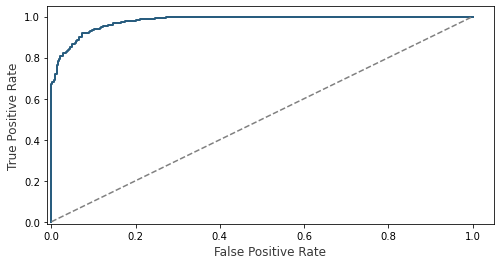

In [42]:
#visualize ROC Curve
#############################

#calculate prediction probability
y_pred_proba = vote_best_test.predict_proba(Xtest)[::,1]
#set true and false predictions
fpr, tpr, _ = metrics.roc_curve(ytest, y_pred_proba)

#plot actual graph
plt.figure(figsize=(8, 4))
plot_roc_curve(fpr, tpr)
plt.show()

### Neural Network

---
The below code transforms the current dataframe into data input for the NN and performs the respective prediction of NN performance on the classification task. In sum, the NNs is used to provide another approach towards classifying professionals.

---

In [43]:
#import required library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder

In [44]:
#dataframe to array transformation
X_n = clean_dataset_dropped.iloc[:,1:].values
y_n = clean_dataset_dropped.iloc[:,:1].values

#output
print(X_n.shape, y_n.shape)

(5188, 94) (5188, 1)


In [45]:
ohe = OneHotEncoder()
y_n = ohe.fit_transform(y_n).toarray()
print('One hot encoded array:')
print(y_n[0:1])

One hot encoded array:
[[1. 0.]]


In [46]:
#train/test split 
#from sklearn.model_selection import train_test_split
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(X_n,y_n,test_size = 0.2,random_state = 42)

In [47]:
#NN model summary
model = keras.models.Sequential()
model.add(Dense(4, input_dim=94, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 380       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 390
Trainable params: 390
Non-trainable params: 0
_________________________________________________________________


In [48]:
#compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer="sgd", metrics=['accuracy']) #optimizer='adam' #keras.optimizer.SGD(lr=1e-3)

In [49]:
history = model.fit(X_train_n, y_train_n, epochs=200, batch_size=128, validation_data=(X_test_n, y_test_n))

Train on 4150 samples, validate on 1038 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/200
4150/4150 [==============================] - 0s 43us/sample - loss: 0.6852 - acc: 0.5742 - val_loss: 0.6670 - val_acc: 0.6002
Epoch 2/200
4150/4150 [==============================] - 0s 10us/sample - loss: 0.6649 - acc: 0.5973 - val_loss: 0.6516 - val_acc: 0.6243
Epoch 3/200
4150/4150 [==============================] - 0s 10us/sample - loss: 0.6540 - acc: 0.6212 - val_loss: 0.6415 - val_acc: 0.6445
Epoch 4/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.6454 - acc: 0.6366 - val_loss: 0.6329 - val_acc: 0.6609
Epoch 5/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.6375 - acc: 0.6463 - val_loss: 0.6249 - val_acc: 0.6705
Epoch 6/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.6297 - acc: 0.6573 - val_loss: 0.6170 - val_acc: 0.6744
Epoch 7/200
4150/4150 [==========

4150/4150 [==============================] - 0s 9us/sample - loss: 0.4104 - acc: 0.8152 - val_loss: 0.4330 - val_acc: 0.8170
Epoch 58/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.4097 - acc: 0.8145 - val_loss: 0.4323 - val_acc: 0.8179
Epoch 59/200
4150/4150 [==============================] - 0s 10us/sample - loss: 0.4091 - acc: 0.8145 - val_loss: 0.4322 - val_acc: 0.8179
Epoch 60/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.4086 - acc: 0.8147 - val_loss: 0.4316 - val_acc: 0.8189
Epoch 61/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.4080 - acc: 0.8159 - val_loss: 0.4313 - val_acc: 0.8198
Epoch 62/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.4074 - acc: 0.8173 - val_loss: 0.4310 - val_acc: 0.8179
Epoch 63/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.4070 - acc: 0.8157 - val_loss: 0.4305 - val_acc: 0.8208
Epoch 64/200
4150/4150 [======================

4150/4150 [==============================] - 0s 9us/sample - loss: 0.3950 - acc: 0.8210 - val_loss: 0.4244 - val_acc: 0.8189
Epoch 117/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.3949 - acc: 0.8219 - val_loss: 0.4236 - val_acc: 0.8208
Epoch 118/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.3948 - acc: 0.8214 - val_loss: 0.4236 - val_acc: 0.8218
Epoch 119/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.3947 - acc: 0.8207 - val_loss: 0.4238 - val_acc: 0.8218
Epoch 120/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.3945 - acc: 0.8227 - val_loss: 0.4246 - val_acc: 0.8179
Epoch 121/200
4150/4150 [==============================] - 0s 10us/sample - loss: 0.3945 - acc: 0.8205 - val_loss: 0.4235 - val_acc: 0.8208
Epoch 122/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.3945 - acc: 0.8217 - val_loss: 0.4236 - val_acc: 0.8208
Epoch 123/200
4150/4150 [===============

4150/4150 [==============================] - 0s 9us/sample - loss: 0.3907 - acc: 0.8236 - val_loss: 0.4216 - val_acc: 0.8227
Epoch 176/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.3906 - acc: 0.8251 - val_loss: 0.4214 - val_acc: 0.8256
Epoch 177/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.3905 - acc: 0.8234 - val_loss: 0.4216 - val_acc: 0.8218
Epoch 178/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.3905 - acc: 0.8234 - val_loss: 0.4214 - val_acc: 0.8227
Epoch 179/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.3904 - acc: 0.8236 - val_loss: 0.4213 - val_acc: 0.8247
Epoch 180/200
4150/4150 [==============================] - 0s 9us/sample - loss: 0.3904 - acc: 0.8229 - val_loss: 0.4213 - val_acc: 0.8256
Epoch 181/200
4150/4150 [==============================] - 0s 10us/sample - loss: 0.3903 - acc: 0.8231 - val_loss: 0.4213 - val_acc: 0.8247
Epoch 182/200
4150/4150 [===============

In [50]:
y_pred_n = model.predict(X_test_n)
#Converting predictions to label
pred_n = list()
for i in range(len(y_pred_n)):
    pred_n.append(np.argmax(y_pred_n[i]))

In [51]:
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test_n)):
    test.append(np.argmax(y_test_n[i]))

from sklearn.metrics import accuracy_score
a = accuracy_score(pred_n,test)
print('Accuracy is:', a*100)


#Scores from independent testruns (used for report)

#Accuracy is: 80.0785083415113
#Accuracy is: 80.5691854759568
#Accuracy is: 79.78410206084396

Accuracy is: 82.7552986512524


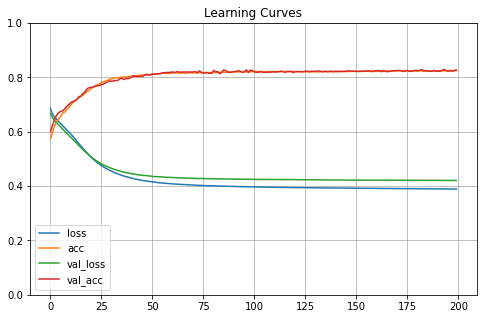

In [52]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.title("Learning Curves")
plt.show()

---